In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3478,7673-LPRNY,Female,0,No,No,23,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,78.55,1843.05,No
3820,9481-IEBZY,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),112.90,8061.5,No
978,6646-QVXLR,Male,1,Yes,No,62,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,103.75,6383.35,Yes
3090,2386-LAHRK,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,53.50,53.5,Yes
2230,5242-UOWHD,Male,0,Yes,Yes,45,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.35,929.2,No


In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [207]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
df.TotalCharges.value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [99]:
df1 = df[df['TotalCharges'] != ' ']

In [101]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

/var/folders/22/l3j8k7cn0m1cq5550f_ty7s00000gn/T/ipykernel_57449/1462773625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


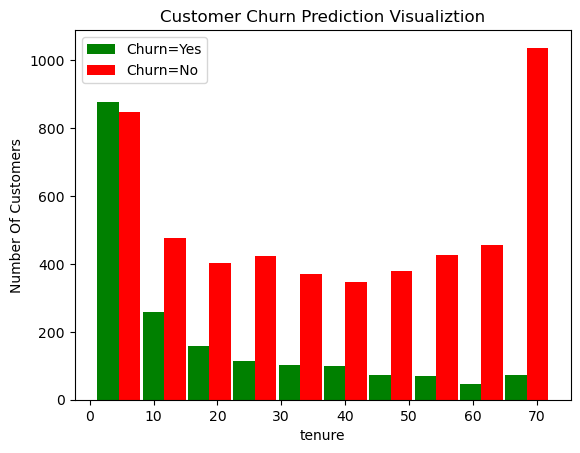

In [103]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


In [105]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/var/folders/22/l3j8k7cn0m1cq5550f_ty7s00000gn/T/ipykernel_57449/2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/var/folders/22/l3j8k7cn0m1cq5550f_ty7s00000gn/T/ipykernel_57449/2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [107]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [109]:
df1.gender.dtype

dtype('O')

In [113]:
for column in df1:
    print(column)
    if df1[column].dtypes == 'object':
        print(df1[column].unique())
        df1 = pd.get_dummies(data=df1, dtype='int', columns=[column], drop_first = True)
        #print(df[column].unique())


gender
['Female' 'Male']
SeniorCitizen
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
PhoneService
['No' 'Yes']
MultipleLines
['No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes']
OnlineBackup
['Yes' 'No']
DeviceProtection
['No' 'Yes']
TechSupport
['No' 'Yes']
StreamingTV
['No' 'Yes']
StreamingMovies
['No' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
TotalCharges
Churn
['No' 'Yes']


In [115]:

df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [117]:
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,1,0,...,1,1,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,1,1,...,0,1,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,1,1


In [121]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [123]:
df2 = df1.copy()

In [127]:
X = df2.drop('Churn_Yes',axis='columns')
y = df2['Churn_Yes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [129]:
X_train.shape

(5625, 23)

In [131]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.6238 - loss: 0.6395
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.7709 - loss: 0.4521
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8065 - loss: 0.4161
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8053 - loss: 0.4127
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.8105 - loss: 0.4085
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8047 - loss: 0.4125
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.7966 - loss: 0.4194
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.8071 - loss: 0.4085
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8015 - loss: 0.4203
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8056 - loss: 0.4048
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8136 - loss: 0.4005
Epoch 12/100
176/176 ━━━━━━━━━━

In [135]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


In [137]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       999
           1       0.62      0.56      0.59       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [139]:
yt = model.predict(X_train)
y_predt = []
for element in yt:
    if element > 0.5:
        y_predt.append(1)
    else:
        y_predt.append(0)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


In [141]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_train,y_predt))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4164
           1       0.72      0.63      0.67      1461

    accuracy                           0.84      5625
   macro avg       0.80      0.77      0.78      5625
weighted avg       0.83      0.84      0.84      5625



In [145]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[857, 142],
       [180, 228]], dtype=int32)>

#### Shap for feature importance

/var/folders/22/l3j8k7cn0m1cq5550f_ty7s00000gn/T/ipykernel_57449/4224493817.py:19: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values, test_samples, feature_names=X_test.columns)


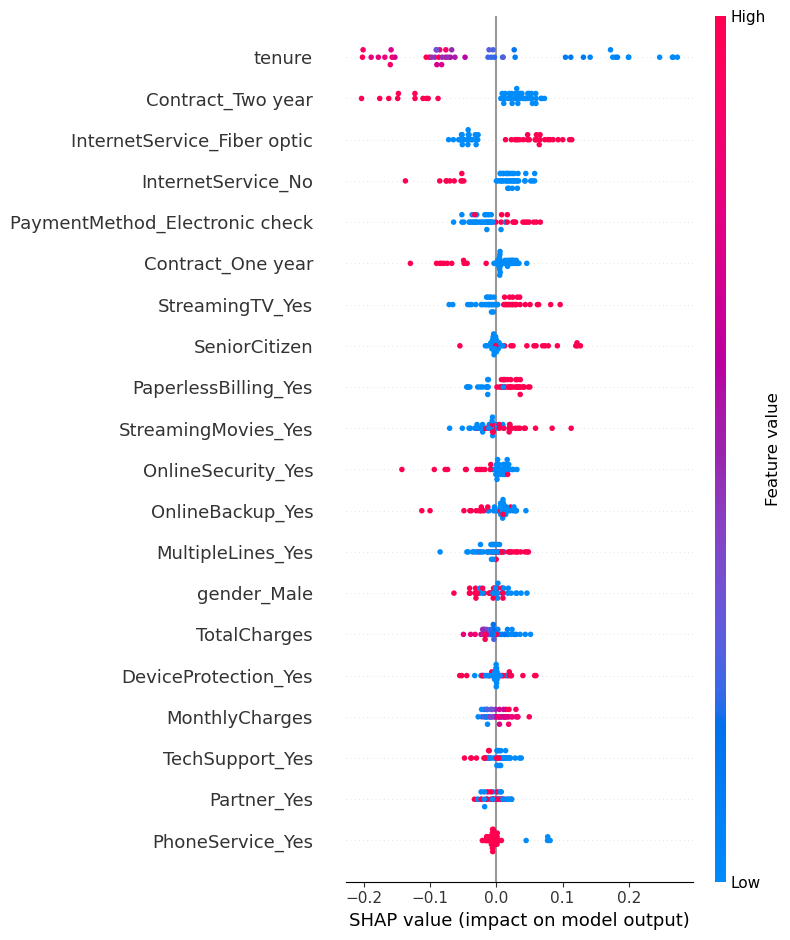

In [165]:
import shap
import numpy as np
import pandas as pd

# Ensure model and data are ready
# model.fit(X_train, y_train, epochs=100)

# Select small background and test data
background = X_train[:100] if isinstance(X_train, np.ndarray) else X_train.sample(100)
test_samples = X_test[:50] if isinstance(X_test, np.ndarray) else X_test.sample(50)

# Create SHAP explainer
explainer = shap.Explainer(model, background)

# Compute SHAP values
shap_values = explainer(test_samples)

# Plot summary
shap.summary_plot(shap_values.values, test_samples, feature_names=X_test.columns)


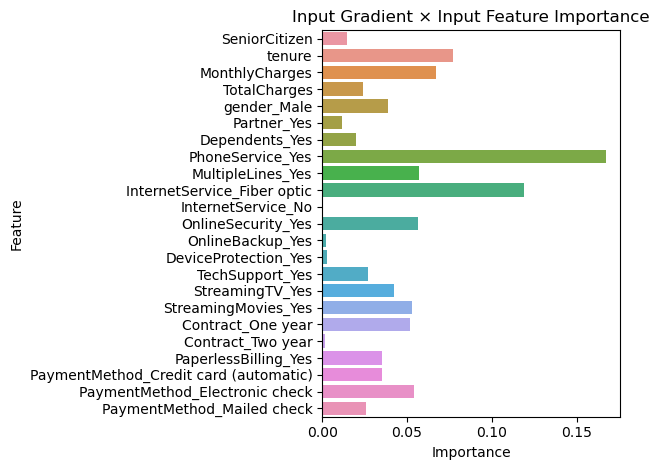

In [181]:
import tensorflow as tf
import numpy as np

# Function to compute Gradient × Input
def compute_input_gradients(model, input_data):
    input_tensor = tf.convert_to_tensor(input_data, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        predictions = model(input_tensor)
    
    grads = tape.gradient(predictions, input_tensor)  # ∂output/∂input
    grads_x_input = grads * input_tensor              # Gradient × Input

    return grads_x_input.numpy()

# Example usage
sample_input = X_test[:10]  # shape = (10, 23)
input_grads = compute_input_gradients(model, sample_input)

# Optional: visualize average feature importance across 10 samples
import matplotlib.pyplot as plt
import seaborn as sns

mean_importance = np.mean(np.abs(input_grads), axis=0)

# Create a pandas Series with feature names and their mean importance


# Display
#print(sorted_importance)

sns.barplot(x=mean_importance, y=X_test.columns)
plt.title("Input Gradient × Input Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


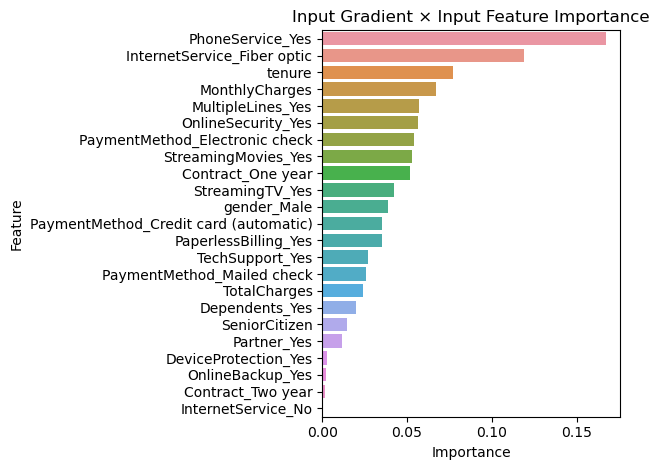

In [193]:
importance_series = pd.Series(mean_importance, index=X_test.columns)

# Sort by the mean value (descending)
sorted_importance = importance_series.sort_values(ascending=False)

sns.barplot(x=sorted_importance.values, y=sorted_importance.index)
plt.title("Input Gradient × Input Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [195]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ae236d919707fc9e9f5e526a9434336c327d682e6d96d917c6bd1bf1d053e937
  Stored in directory: /Users/madhav/Library/Caches/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [217]:
from lime import lime_tabular
import numpy as np
import pandas as pd

# Use a small sample for explanation
X_array = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_array = y_test.values if isinstance(y_test, pd.Series) else y_test

# Create LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Not Churn', 'Churn'],  # or ['No', 'Yes'] for binary
    mode='classification'
)

# Choose one test sample
i = 5  # index of the test sample to explain
sample = X_array[i]

# Explain the instance
# explanation = explainer.explain_instance(
#     data_row=sample,
#     predict_fn=lambda x: model.predict(x).reshape(-1, 1)  # LIME expects 2D output
# )

explanation = explainer.explain_instance(
    data_row=sample,
    predict_fn=lambda x: np.hstack([(1 - model.predict(x)), model.predict(x)])
)

# Show explanation in notebook
explanation.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
